# Mar23 - Accidents in France project
## Step 1: Data mining + DataViz’
### Goals
- Define the context and understand the scope of the project
- Discovering the dataset and exhaustive analysis to highlight structure, difficulties and bias
- Create 5 graphics
- Analysis of the graphs and providing a business opinion
- Validation of data manipulation or a statistical test

### Discovering dataset and analysis of structure, difficulties and bias

#### Structure

The dataset is structured in 4 tables representing the years 2005-2021 and 1 table representing 2009-2021

__*2005-2021*__

Table 1 - Features (caracteristics): Georeference, date, time, weather conditions, department, etc.

Table 2 - Places (lieux): More (!) information on road conditions, local conditions, surface conditions, etc.

Table 3 - Users (usagers): Information on the persons involved, injuries, etc.

Table 4 - Vehicles (vehicules): Information regarding the vehicles involved, direction of traffic etc.

__*2009-2021*__

Table 5 - Registered vehicles: More information on the cars

#### Difficulties / bias
- Same type of information is scattered in different tables
- Inconsistent data formatting
    - years: [9, 14, 2021] -> padding required
    - id_vehicules: includes a tricky white space (protected space) -> required regex operation to eliminate
- Inconsistent data: same variable with different content
- Mixed type variables

### Correlation matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./data/merged_tables.csv', low_memory=False, index_col=0)

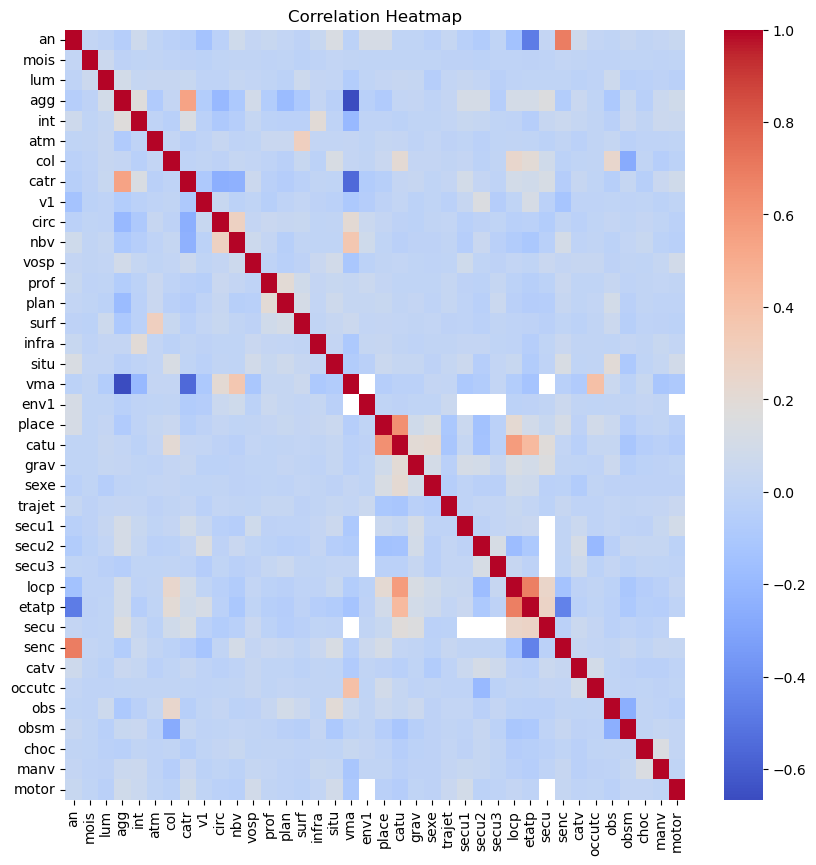

In [3]:
# Select the data for the correlation (numeric only)
columns = ['an', 'mois', 'lum', 'agg', 'int', 'atm', 'col', 
       'catr', 'v1', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra',
       'situ', 'vma', 'env1', 'place', 'catu', 'grav', 'sexe',
        'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'etatp',
       'secu', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'motor']
df_select = df[columns]

# Scale the data
scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_select), columns=columns)

# Create a correlation matrix
correlation_matrix = df_numeric_scaled.corr()
plt.figure(figsize=(10, 10))
# Generate the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

#### Interpretation of the correlation

- only few stronger positive or negative correlation

- most variables are uncorrelated